In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index

In [2]:
def assign_to_grid(xcord, ycord, xgridsize, ygridsize, xmin, xrange, ymin, yrange):
    # Assign a lat and long coordinate to a grid location. Input xcord, ycord as lat/long to be mapped
    # gridsize is dimension of matrix
    # min is smallest lat/long coordinate, range is max(xcoordinate) - min(xcoordinate) and repeat for y
    
    xbin = int((xcord-xmin)/(xmax-xmin)*(xgridsize-1))
    ybin = int((ycord-ymin)/(ymax-ymin)*(ygridsize-1))
    return xbin, ybin

#xmax =  data['XCOORD'].max()
#xmin =  data['XCOORD'].min()
#xrange = xmax-xmin
#ymax =  data['YCOORD'].max()
#ymin =  data['YCOORD'].min()
#yrange = ymax-ymin

#xgridsize = 50
#ygridsize = int(xgridsize*yrange/xrange)

#points = []
#for i in range(0, 400):
#    point = assign_to_grid(data['XCOORD'][i], data['YCOORD'][i], xgridsize, ygridsize, xmin, xrange, ymin, yrange)
#    points.append(point)
#plt.plot(*zip(*points), marker='o', color='b', ls='')
#plt.title("Gridded Event Locations")

#### Actual data

In [4]:
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv')
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')
full_data.head()

/home/march/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CALL_NO,UNIT_DISPATCH_DATE,DISPATCH_TIME,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,YCOORD,XCOORD,DATE_TIME
0,0,0,0,61209515,2006-12-28,44548,773A,UNCONSCIOUS PERS,39.824332,-86.236119,2006-12-28 04:45:48
1,1,1,1,61209516,2006-12-28,44853,774A,ASSAULT/TRAUMA,39.781627,-86.120826,2006-12-28 04:48:53
2,2,2,2,61209517,2006-12-28,45219,768A,SEIZURE,39.756840,-85.998714,2006-12-28 04:52:19
3,3,3,3,61209519,2006-12-28,51057,773A,UNCONSCIOUS PERS,39.782064,-86.044592,2006-12-28 05:10:57
4,4,4,4,61209520,2006-12-28,51756,790A,*MEDICAL ALARM,39.742415,-86.111559,2006-12-28 05:17:56


In [6]:
Event_Type_Lookup = {}
for i in range(0, len(full_data)):
    key = full_data.CALL_TYPE_FINAL[i]
    val = full_data.CALL_TYPE_FINAL_D[i]
    Event_Type_Lookup.setdefault(key, [])
    if val not in Event_Type_Lookup[key]:
        Event_Type_Lookup[key].append(val)

In [7]:
top_labels = full_data.CALL_TYPE_FINAL.sort_values().value_counts()[:20]
top_labels

766A      90331
765A      86018
790A      73456
773A      57410
790B      46434
792B      45329
768A      42483
792A      37433
767A      31061
770A      27201
770B      26876
775A      23420
767B      21126
772A      18392
790C      15255
790ALR    15233
771A      14679
774B      13939
791A      12723
792C      11709
Name: CALL_TYPE_FINAL, dtype: int64

In [8]:
Event_Type_Lookup['792C']

['INJURED PERSON',
 '*EYE',
 '*HAND IN DOOR',
 '*KNEE PROBLEM',
 '*HIP PAIN',
 '*BROKEN ANKLE',
 '*DISLOCATED THUM',
 '*CHECK OUT',
 '*HAND STUCK',
 '*DOG SCRATCHED',
 '*LEG',
 '*ELBOW',
 '*MEDICAL ALARM',
 '*BROKEN ARM',
 '*INJURED',
 '*ASSIST PATIENT',
 '*INJ PERSON',
 '*PATIENT ASSIST',
 '*INJ CHILD',
 '*BACK PAIN',
 '*1 YO',
 '*HIP',
 'INJURED PERSON-C']

In [9]:
#Event_Type_Lookup['772A']
Event_Type_Lookup.items()    # for name, age in list.items():  (for Python 3.x)
for label, events in Event_Type_Lookup.items():
    for i in range(0, len(events)):
        if events[i] == 'OVERDOSE':
            print(label)

772A
772C
772B


In [155]:
data = full_data.loc[full_data['CALL_TYPE_FINAL'].isin(['772A', '772B', '772C'])] 
data.reset_index(drop=True, inplace=True)
data = data[20000:23489]
data.reset_index(drop=True, inplace=True)
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CALL_NO,UNIT_DISPATCH_DATE,DISPATCH_TIME,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,YCOORD,XCOORD,DATE_TIME
0,812856,812855,812855,151102721,2015-11-06,63615,772A,OVERDOSE,39.824162,-86.102844,2015-11-06 06:36:15
1,812894,812894,812894,151102783,2015-11-06,100404,772C,OVERDOSE-C,39.809977,-86.161557,2015-11-06 10:04:04
2,812949,812949,812949,151102888,2015-11-06,142638,772A,OVERDOSE,39.823639,-86.283484,2015-11-06 14:26:38
3,812963,812963,812963,151102912,2015-11-06,150349,772B,OVERDOSE,39.760149,-86.115152,2015-11-06 15:03:49
4,812991,812991,812991,151102959,2015-11-06,163817,772A,OVERDOSE,39.777792,-86.089662,2015-11-06 16:38:17
5,812993,812993,812993,151102965,2015-11-06,164908,772A,OVERDOSE,39.704669,-86.009703,2015-11-06 16:49:08
6,813002,813001,813001,151102981,2015-11-06,172221,772C,OVERDOSE-C,39.744641,-86.082890,2015-11-06 17:22:21
7,813028,813028,813028,151103026,2015-11-06,182443,772A,OVERDOSE,39.750165,-86.026129,2015-11-06 18:24:43
8,813045,813045,813045,151103059,2015-11-06,193722,772A,OVERDOSE,39.812249,-86.235600,2015-11-06 19:37:22
9,813053,813053,813053,151103073,2015-11-06,200948,772B,OVERDOSE,39.822752,-86.009977,2015-11-06 20:09:48


In [156]:
np.seterr(divide = 'raise', over = 'warn', invalid = 'raise', under = 'warn')

{'divide': 'raise', 'over': 'warn', 'under': 'warn', 'invalid': 'raise'}

In [157]:
def periodic_update(d, h, day, hour):
    dt_d = .05
    for i in range(0, len(d)):
        d[i] = (1-dt_d)*d[i]
    dt_h = .005
    for i in range(0, len(h)):
        h[i] = (1-dt_h)*h[i]
    d[day] = d[day] + dt_d
    h[hour] = h[hour] + dt_h
    return d, h

In [177]:
def global_update(F_xy, w, time_delta_last_time, theta, mu_xy, d, h):
# Decay triggering exponentials and calculate current intensities for all grids
    for k in range(0, len(w)):
        F_xy[k] = F_xy[k] * math.e ** (-1*w[k]*time_delta_last_time)
        
    Lam_xy = mu_xy+sum(F_xy)*d*h
    
    return F_xy, Lam_xy

In [159]:
def event_update(mu_g, Lam_g, time_delta_last_g_time, theta, w, F_g, time_delta_last_time):
# update mu, theta and triggering exponentials for grids where event occurred
    dt = .005 
    if Lam_g == 0:
        Lam_g = 1e-10
    mu_g = mu_g + dt*(mu_g/Lam_g - mu_g*time_delta_last_g_time)
    for k in range(0, len(w)):
        theta[k] = theta[k] + dt * (F_g[k]/Lam_g-theta[k])
        F_g[k] = F_g[k] + w[k]*theta[k]
    return mu_g, theta, F_g

In [178]:
# set up grid sizing
xmax =  full_data['XCOORD'].max()
xmin =  full_data['XCOORD'].min()
xrange = xmax-xmin
ymax =  full_data['YCOORD'].max()
ymin =  full_data['YCOORD'].min()
yrange = ymax-ymin

ygridsize = 50
xgridsize = 50

# initial parameters
w = [.5, .1, .01]
theta = [.01, .01, .01]

h = np.ones(24)
d = np.ones(32)

mu = np.ones([xgridsize, ygridsize])*.0000001
F = np.ones([xgridsize, ygridsize, len(w)])*.1
Lam = np.ones([len(data), xgridsize, ygridsize])*0.000000001

# for storing time of past event in specific grid cell
G_times = pd.DataFrame(np.zeros([xgridsize, ygridsize]))
G_times[:] = data.DATE_TIME[0]

# (tracking model parameters)
theta_track = np.zeros([len(data), len(theta)])

for i in range(1, len(data)):
    # update periodic parameters
    day = data.DATE_TIME[i].day
    hour = data.DATE_TIME[i].hour
    d, h = periodic_update(d, h, day, hour)
    
    # assign event to a grid
    gx, gy = assign_to_grid(data.XCOORD[i], data.YCOORD[i], xgridsize, ygridsize, xmin, xrange, ymin, yrange)
    # time since last event in any grid box 
    time_delta = (data.DATE_TIME[i]- data.DATE_TIME[i-1]).total_seconds()*1.15741e-5
    
    # update exponentials, intensities for all grid boxes
    for x in range(xgridsize):
        for y in range(ygridsize):
            F[x][y], Lam[i][x][y] = global_update(F[x][y], w, time_delta, theta, mu[x][y], d[day], h[hour]) 
            
    # find last time event occurred at this grid location
    last_g_time = pd.to_datetime(G_times.at[gx,gy])
    # find delta between last event time and current time. 
    g_time_delta = (data.DATE_TIME[i] - last_g_time).total_seconds()*1.15741e-5
    # update event time for this location
    G_times.at[gx,gy] = data.DATE_TIME[i]
    
    # update model parameters based on grid box where current event happened
    mu[gx][gy], theta, F[gx][gy] = event_update(mu[gx][gy], Lam[i][gx][gy], g_time_delta, theta, w, F[gx][gy], time_delta)
    
    # (tracking model parameters)
    theta_track[i] = theta
    
    #print(i/events*100) F_xy is really small

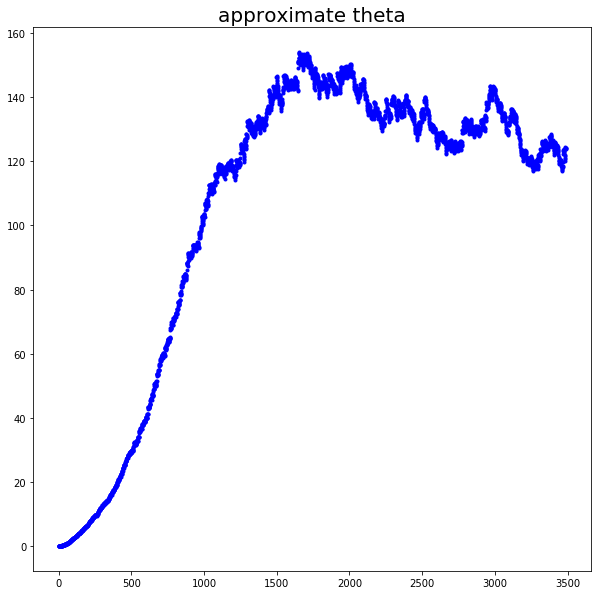

In [183]:
t_est = []
plt.figure(figsize=(10,10))
for i in range(0, len(data)):
    t_est.append(sum(theta_track[i]))
plt.plot(t_est[:], 'b.')
plt.title('approximate theta',fontsize=20)
plt.show()


In [180]:
h, d, sum(h), sum(d[1:])

(array([0.05955466, 0.04064712, 0.04472445, 0.02959856, 0.0128262 ,
        0.01538672, 0.0192969 , 0.02248044, 0.02919781, 0.0236493 ,
        0.01895653, 0.03953327, 0.05453028, 0.03942963, 0.05595438,
        0.04617274, 0.04150842, 0.06024914, 0.07033688, 0.05731069,
        0.05135446, 0.04755986, 0.05976901, 0.05997315]),
 array([1.99496485e-78, 7.01346860e-09, 2.18699151e-08, 1.08644762e-07,
        1.52251619e-07, 2.25286596e-07, 6.05259069e-07, 9.59261653e-07,
        1.39866105e-06, 5.28958170e-06, 5.14819313e-06, 1.31996640e-05,
        2.84940497e-05, 4.73089252e-05, 7.80268992e-05, 1.53921809e-04,
        2.24427233e-04, 5.30228780e-04, 7.30184538e-04, 9.23213952e-04,
        1.39159710e-03, 3.91960850e-03, 9.33046977e-03, 1.82633277e-02,
        6.37923248e-02, 1.64079838e-01, 7.70415320e-02, 4.33219312e-01,
        2.26219063e-01, 7.65326254e-10, 1.33399835e-09, 3.79019454e-09]),
 1.000000586993749,
 0.9999999999999991)

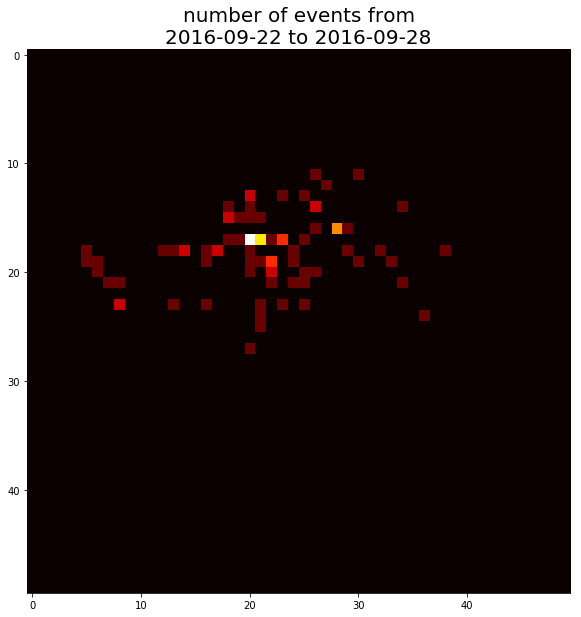

7.0 (17, 20)
119.374440434426 (17, 20)


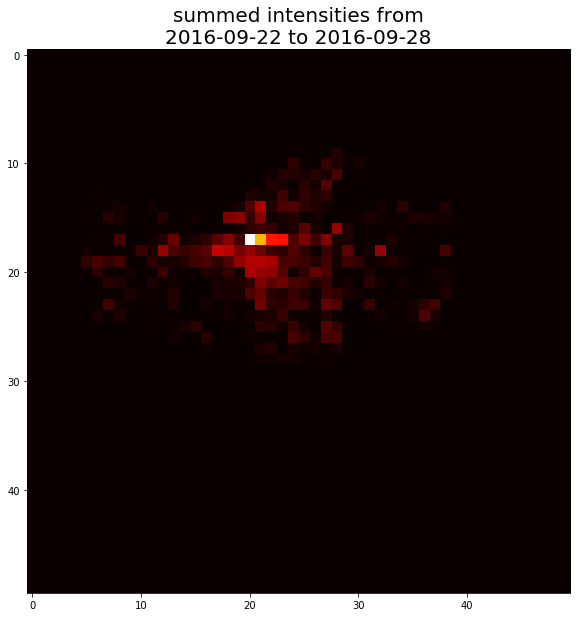

In [181]:
start = 3400#3489
length = len(data)-start

tot_events = np.zeros([xgridsize, ygridsize])

plt.figure(figsize=(20,10))

for i in range(start, len(data)):
    x, y = assign_to_grid(data['XCOORD'][i], data['YCOORD'][i], xgridsize, ygridsize, xmin, xrange, ymin, yrange)
    tot_events[x][y] = tot_events[x][y] + 1

plt.title("number of events from\n"+str(data.UNIT_DISPATCH_DATE[start])+" to "+str(data.UNIT_DISPATCH_DATE.iloc[-1]), fontsize=20)
plt.imshow(tot_events, cmap = 'hot', interpolation = 'nearest')
plt.show()
print(np.amax(tot_events), unravel_index(tot_events.argmax(), tot_events.shape))

tot_intensity = sum(Lam[start:,:])  #sum(Lam[start:,:])

plt.figure(figsize=(20,10))
plt.imshow(tot_intensity, cmap = 'hot', interpolation = 'nearest')
plt.title("summed intensities from\n"+str(data.UNIT_DISPATCH_DATE[start])+" to "+str(data.UNIT_DISPATCH_DATE[len(data)-1]), fontsize=20)
print(np.amax(tot_intensity), unravel_index(tot_intensity.argmax(), tot_intensity.shape))
plt.show()

In [182]:
tot_intensity_copy = np.copy(tot_intensity)
pred_locs = []

tot_events_copy = np.copy(tot_events)
actual_locs = []

top_points = 10

for i in range(0, top_points):
    indx = unravel_index(tot_events_copy.argmax(), tot_events_copy.shape)
    actual_locs.append(indx)
    tot_events_copy[indx[0]][indx[1]] = 0

for i in range(0, top_points):
    indx = unravel_index(tot_intensity_copy.argmax(), tot_intensity_copy.shape)
    pred_locs.append(indx)
    tot_intensity_copy[indx[0]][indx[1]] = 0

print("Time period: " + str((data.DATE_TIME.iloc[-1]-data.DATE_TIME[start]).total_seconds()*1.15741e-5) + " days")

print("\nTop model hotspots in real top 10:")
for i in range(0, top_points):
    if pred_locs[i] in actual_locs:
        pre = tot_intensity[pred_locs[i][0]][pred_locs[i][1]]*(1/length*(data.DATE_TIME.iloc[-1]-data.DATE_TIME[start]).total_seconds()*1.15741e-5)
        print("Grid: " + str(pred_locs[i]) +", Model: "+ str(pre)+", Real: "+ str(int(tot_events[pred_locs[i][0]][pred_locs[i][1]])))

print("\nTop model hotstpots not in real top 10")
for i in range(0, top_points):
    if pred_locs[i] not in actual_locs:
        pre = tot_intensity[pred_locs[i][0]][pred_locs[i][1]]*(1/length*(data.DATE_TIME.iloc[-1]-data.DATE_TIME[start]).total_seconds()*1.15741e-5)
        print("Grid: " + str(pred_locs[i]) +", Model: "+ str(pre)+", Real: "+ str(int(tot_events[pred_locs[i][0]][pred_locs[i][1]])))

print("\nReal top 10 hotspots not predicted by model")
for i in range(0, top_points):
    if actual_locs[i] not in pred_locs:
        pre = tot_intensity[actual_locs[i][0]][actual_locs[i][1]]*(1/length*(data.DATE_TIME.iloc[-1]-data.DATE_TIME[start]).total_seconds()*1.15741e-5)
        print("Grid: " + str(actual_locs[i]) +", Model: "+ str(pre)+", Real: "+ str(int(tot_events[actual_locs[i][0]][actual_locs[i][1]])))


Time period: 6.130569288 days

Top model hotspots in real top 10:
Grid: (17, 20), Model: 8.222845823589635, Real: 7
Grid: (17, 21), Model: 5.251084058272705, Real: 5
Grid: (17, 23), Model: 3.1847903117550764, Real: 3
Grid: (18, 17), Model: 2.333207096192883, Real: 2

Top model hotstpots not in real top 10
Grid: (17, 22), Model: 3.279850597589332, Real: 1
Grid: (18, 18), Model: 2.135357785775719, Real: 0
Grid: (19, 21), Model: 2.1197458773306592, Real: 1
Grid: (19, 20), Model: 2.056747636487512, Real: 1
Grid: (14, 21), Model: 1.9821661801932926, Real: 0
Grid: (20, 20), Model: 1.9698108378008854, Real: 1

Real top 10 hotspots not predicted by model
Grid: (16, 28), Model: 1.7448268179949011, Real: 4
Grid: (19, 22), Model: 1.9487672711390425, Real: 3
Grid: (13, 20), Model: 0.2643450692838491, Real: 2
Grid: (14, 26), Model: 0.31237305001256, Real: 2
Grid: (15, 18), Model: 1.4587367336340056, Real: 2
Grid: (18, 14), Model: 0.5510482581787761, Real: 2


In [150]:
Lam[-1][14][23]*(data.DATE_TIME.iloc[-1]-data.DATE_TIME[start]).total_seconds()*1.15741e-5

1.6616451732529385

0.00017943836909309032 (17, 26) 1e-07


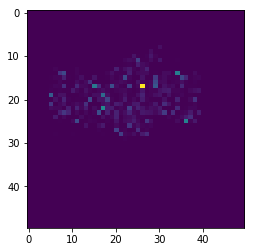

In [169]:
print(np.amax(mu),unravel_index(mu.argmax(), mu.shape), np.amin(mu))
plt.imshow(mu)

In [170]:
h, d, sum(h), sum(d)

(array([0.05955466, 0.04064712, 0.04472445, 0.02959856, 0.0128262 ,
        0.01538672, 0.0192969 , 0.02248044, 0.02919781, 0.0236493 ,
        0.01895653, 0.03953327, 0.05453028, 0.03942963, 0.05595438,
        0.04617274, 0.04150842, 0.06024914, 0.07033688, 0.05731069,
        0.05135446, 0.04755986, 0.05976901, 0.05997315]),
 array([1.99496485e-78, 7.01346860e-09, 2.18699151e-08, 1.08644762e-07,
        1.52251619e-07, 2.25286596e-07, 6.05259069e-07, 9.59261653e-07,
        1.39866105e-06, 5.28958170e-06, 5.14819313e-06, 1.31996640e-05,
        2.84940497e-05, 4.73089252e-05, 7.80268992e-05, 1.53921809e-04,
        2.24427233e-04, 5.30228780e-04, 7.30184538e-04, 9.23213952e-04,
        1.39159710e-03, 3.91960850e-03, 9.33046977e-03, 1.82633277e-02,
        6.37923248e-02, 1.64079838e-01, 7.70415320e-02, 4.33219312e-01,
        2.26219063e-01, 7.65326254e-10, 1.33399835e-09, 3.79019454e-09]),
 1.000000586993749,
 0.9999999999999991)

In [966]:
sum(h), sum(d)

(1.2539086090911913, 0.9999999999999992)

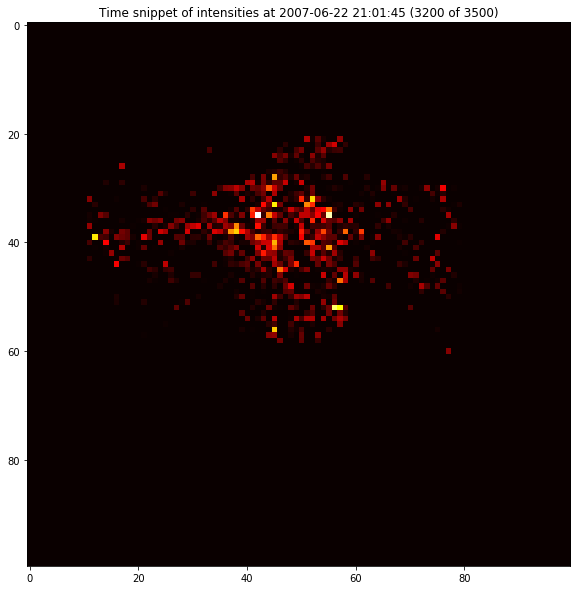

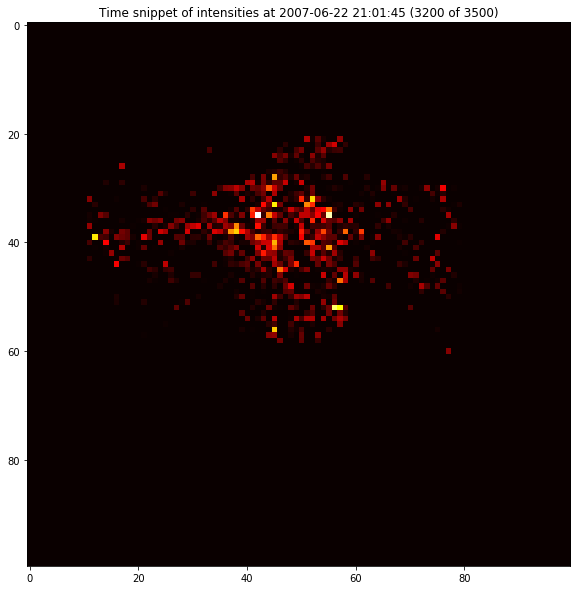

In [560]:
import time
import pylab as pl
from IPython import display
plt.figure(figsize=(20,10))
end = len(data)
for n in range(0, int(end/200)): 
    i = n*200
    plt.title('Time snippet of intensities at '+data.DATE_TIME[i].strftime('%Y-%m-%d %H:%M:%S') + ' ('+str(i)+' of ' + str(end) +')')
    plt.imshow(Lam[i], cmap = 'hot', interpolation = 'nearest')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.0005)
# color scale from black (low) to white (high)

In [69]:
np.save('F.npy', F)
np.save('mu.npy', mu)
np.save('theta.npy', theta)

In [98]:
times = data.DATE_TIME[-30:].values
np.save('last_times.npy', times)

In [99]:
G_times.to_pickle('G_times.pkl')

In [95]:
Lam_save = Lam[-30:,:]